# STUDENT MENTAL HEALTH 
## EDA AND ML(Logistic regression)

In [3]:
#let's check the system version
!jupyter --version
import sys
print("Python version:",sys.version)

jupyter core     : 4.7.1
jupyter-notebook : 6.3.0
qtconsole        : 5.0.3
ipython          : 7.22.0
ipykernel        : 5.3.4
jupyter client   : 6.1.12
jupyter lab      : 3.0.14
nbconvert        : 6.0.7
ipywidgets       : 7.6.3
nbformat         : 5.1.3
traitlets        : 5.0.5
Python version: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [91]:
# import necessary libraries

import pandas as pd # pandas used for data manipulation and analysis
import collections #collections for manipulation of Python's collection like OrderedDict, defaultdict, Counter, etc
import numpy as np #numpy for scientific computing
import matplotlib.pyplot as plt #used for data visualization
%matplotlib inline
import seaborn as sns #for advanced visualization

# Classifier libraries
from sklearn.linear_model import LogisticRegression #for logistic regression algorithm
from sklearn.tree import DecisionTreeClassifier #for implementing decesion tree algorithm
from sklearn.ensemble import RandomForestClassifier #for implementing random forest algorithm
from sklearn.svm import SVC #for implementing support vehicle machine(SVM) algorithm
from sklearn.naive_bayes import GaussianNB #for implementing Naive Bayes algorithm
from sklearn.neighbors import KNeighborsClassifier #for implementing KNN algorithm

#For statistical testing
from scipy.stats import ttest_ind #for computing t-test for two independent samples
import statsmodels.api as sm #for statistical model and tests
from scipy.stats import chi2_contingency # sor computing chi-square statistic and p-value for a contingency table
import scipy.stats as stats #for implementing skewness and other stats

# Other Libraries
from sklearn.model_selection import train_test_split # for splitting data into training and testing sets
from sklearn.pipeline import make_pipeline # for building a pipeline of transforms with a final estimator
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline # for building a pipeline with imbalanced datasets
# from imblearn.over_sampling import SMOTE # for oversampling imbalanced datasets using Synthetic Minority Over-sampling Technique (SMOTE)
# from imblearn.under_sampling import NearMiss # for undersampling imbalanced datasets using NearMiss algorithm
# from imblearn.metrics import classification_report_imbalanced # for generating a classification report for imbalanced datasets
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report # for computing various performance metrics for classification models
from collections import Counter # for counting the frequency of elements in a list
from sklearn.model_selection import KFold, StratifiedKFold # for k-fold cross-validation
from sklearn.model_selection import cross_val_score # for evaluating a model using cross-validation
from sklearn.metrics import cohen_kappa_score # for computing Cohen's kappa score for inter-rater agreement

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 5000) # for setting the maximum number of columns to display in pandas dataframes



# Exploratory Data Analysis
- Exploratory Data Analysis(EDA) is an approach that is used to analyse the data and discover trends, patterns, or check assumptions in data with the help of statistical summaries and graphical representations.


In [6]:
df=pd.read_csv('Student Mental health.csv') # read the data file

Understanding the data

In [7]:
df.shape #gives the size of the data file

(101, 11)

In [8]:
df.columns #gives the name of the columns present in the Data set

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [9]:
df.info() # gives the basic info of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

> ## The dataset has data of object and float type. The total memory is is 8.8 KB


In [10]:
df.describe() #gives the summary statistics

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [11]:
#checking null values

#Inspect missing values in the dataset
print(df.isnull().values.sum())

#checking which value has null
df.isnull().sum().sort_values(ascending=False)

1


Age                                             1
Timestamp                                       0
Choose your gender                              0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

Only age has a null value 

In [12]:
df.dtypes # gives the type of data 

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

> ## Here time stamp is in object we have to change it to datetime


In [13]:
# check for duplicate data
df.duplicated().sum()

0

 > There are no duplicate datas

 > # clean data

In [14]:
df.sample()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
72,8/7/2020 22:35,Female,19.0,BIT,Year 3,3.00 - 3.49,Yes,Yes,No,No,No


In [15]:
#changing timestamp  to datetime type and fetching month,day,hour
import datetime as dt
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df["month"]=df["Timestamp"].dt.month_name()
df["day"]=df["Timestamp"].dt.day_name()
df["year"]=df["Timestamp"].dt.year
df["hour"]=df["Timestamp"].dt.hour
df.sample()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,month,day,year,hour
10,2020-08-07 12:39:00,Female,20.0,Psychology,year 1,3.50 - 4.00,No,No,No,No,No,August,Friday,2020,12


In [16]:
# filling age with mean 
df['Age'].fillna(df["Age"].median(),inplace=True)


In [17]:
df["Age"]=df["Age"].astype("int")


In [18]:
#converting year to interger
def Clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text
df["Year"] = df["Your current year of Study"].apply(Clean)
print("First three values of Year after cleaning text:")
print(df["Year"][:3], "\n")

First three values of Year after cleaning text:
0    1
1    2
2    1
Name: Year, dtype: int64 



array(['Year 1', 'Year 2', 'Year 3', 'Year 4'], dtype=object)

In [19]:
df.dtypes

Timestamp                                       datetime64[ns]
Choose your gender                                      object
Age                                                      int32
What is your course?                                    object
Your current year of Study                              object
What is your CGPA?                                      object
Marital status                                          object
Do you have Depression?                                 object
Do you have Anxiety?                                    object
Do you have Panic attack?                               object
Did you seek any specialist for a treatment?            object
month                                                   object
day                                                     object
year                                                     int64
hour                                                     int64
Year                                                   

> Filled the Null value of age with median converted time stamp to datetime64 and age to int32

In [20]:
#Create a copy of data frame to avoid modifying the original
df_copy = df.copy()

## Ready For EDA

<AxesSubplot:xlabel='Age', ylabel='Your current year of Study'>

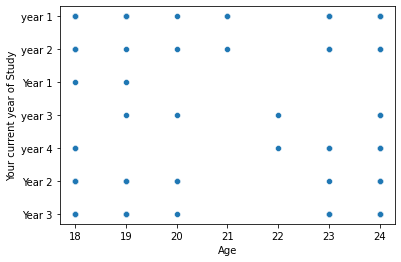

In [21]:
#checking for outliners
# seaborn Scatterplot
sns.scatterplot(x=df['Age'], y=df['Your current year of Study'])


## Gender distribution

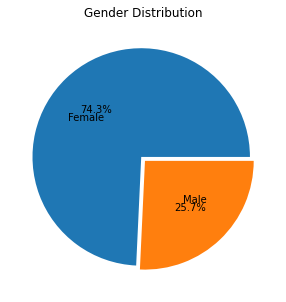

In [22]:
plt.figure(figsize=(14, 5))
plt.title('Gender Distribution')
plt.pie(df_copy['Choose your gender'].value_counts(),labels=df_copy['Choose your gender'].value_counts().index, autopct='%1.1f%%', explode=(0.025,0.025), labeldistance=0.5)
plt.show()


### The survey has a very high participation of females which may result in a gender bias

## Age distribution

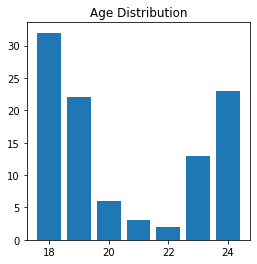

In [24]:
plt.figure(figsize=(4,4))
plt.title('Age Distribution')
plt.bar(x=df_copy['Age'].value_counts().index, height=df_copy['Age'].value_counts().values)
plt.show()

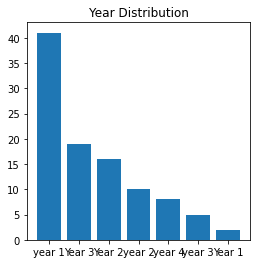

In [25]:
plt.figure(figsize=(4,4))
plt.title('Year Distribution')
plt.bar(x=df_copy['Your current year of Study'].value_counts().index, height=df_copy['Your current year of Study'].value_counts().values)
plt.show()

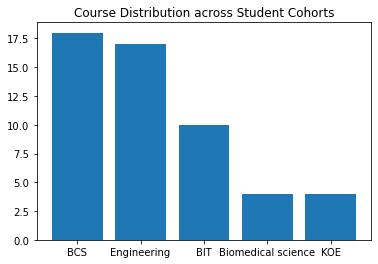

In [26]:
x = df_copy.groupby('What is your course?')['Choose your gender'].count().sort_values(ascending=False).head().index.to_list()
y = df_copy.groupby('What is your course?')['Choose your gender'].count().sort_values(ascending=False).head().values.tolist()
plt.title("Course Distribution across Student Cohorts")
plt.bar(x, y)
plt.show()

The survey primarily focuses on the participation of students studying Engineering and Computer Science disciplines, which may result in a potential bias towards the perspectives and experiences of individuals within these fields.

### Year wise anxiety,depression,panic attack

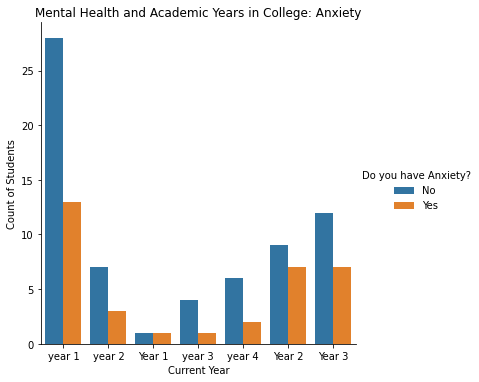

In [27]:
sns.catplot(data=df_copy, x="Your current year of Study", hue='Do you have Anxiety?', kind="count")\
    .set(title="Mental Health and Academic Years in College: Anxiety", \
        xlabel='Current Year',\
        ylabel='Count of Students')

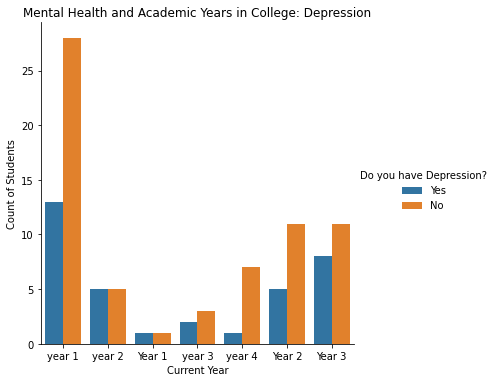

In [28]:
sns.catplot(data=df_copy,x="Your current year of Study", hue='Do you have Depression?', kind="count")\
    .set(title="Mental Health and Academic Years in College: Depression", \
        xlabel='Current Year',\
        ylabel='Count of Students')

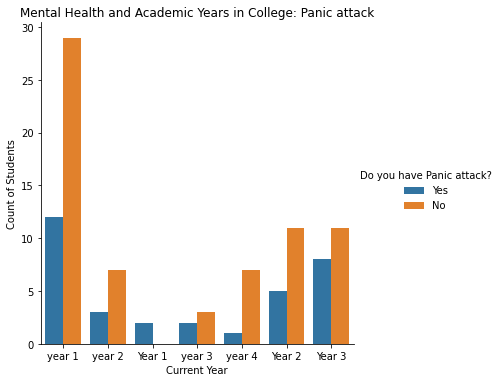

In [29]:
sns.catplot(data=df_copy,x="Your current year of Study", hue='Do you have Panic attack?', kind="count")\
    .set(title="Mental Health and Academic Years in College: Panic attack", \
        xlabel='Current Year',\
        ylabel='Count of Students')

> ### It can be seen that the year1 students have more symptoms and year 4 students hace the least symptoms


### Anxiety, Depression and panic attack as per course

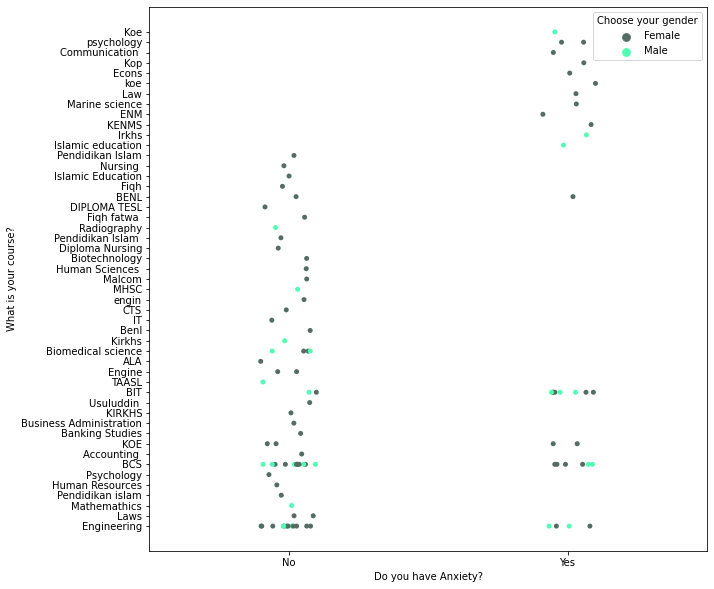

In [30]:
#For anxiety
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Do you have Anxiety?', y = 'What is your course?', hue = 'Choose your gender', data = df_copy, palette = ['#546D64', '#50FFB1'])
plt.show()

> 
- It can be observed that students studying Engineering and BCS are have more anxiety
- Female students have more anxiety than males

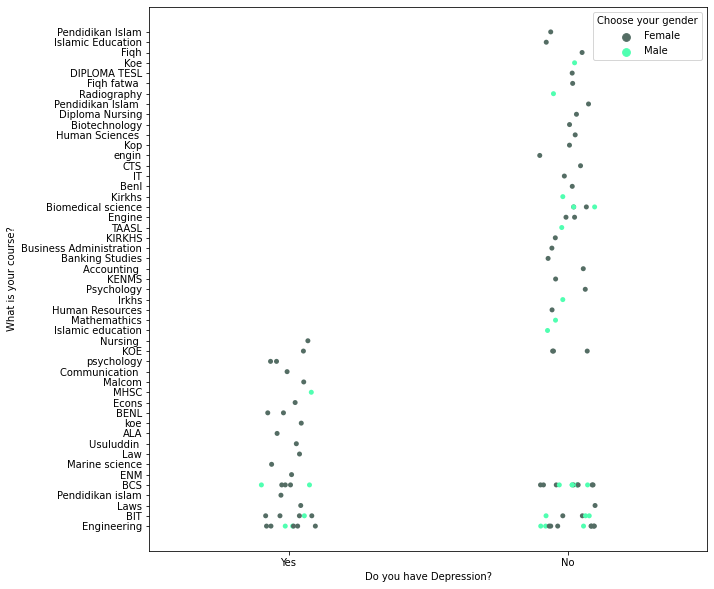

In [31]:
#for Depression
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Do you have Depression?', y = 'What is your course?', hue = 'Choose your gender', data = df_copy, palette = ['#546D64', '#50FFB1'])
plt.show()

- students in BCS and Engineering are more depressed

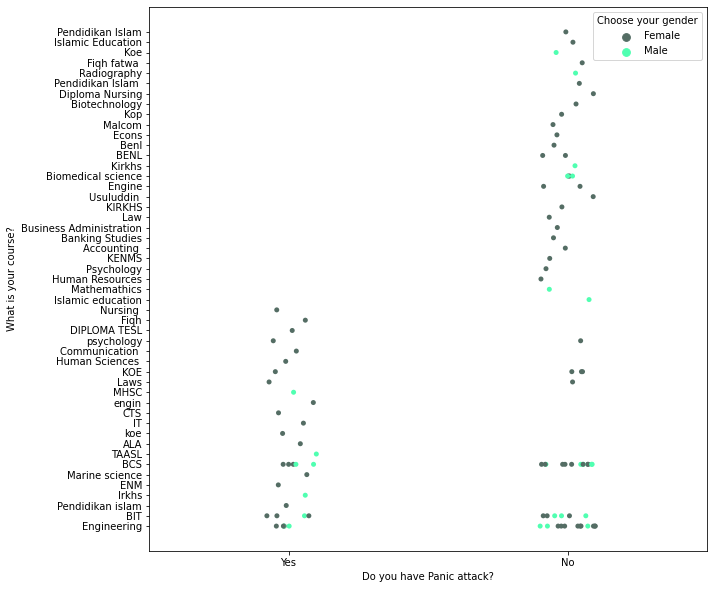

In [33]:
#for panic attack
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Do you have Panic attack?', y = 'What is your course?', hue = 'Choose your gender', data = df_copy, palette = ['#546D64', '#50FFB1'])
plt.show()

- students studying non tech fields have least panic attacks

Text(0.5, 0, 'Gender VS Age')

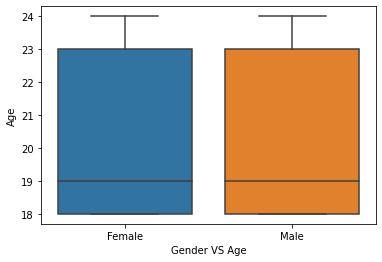

In [34]:
#box plot
sns.boxplot(y = 'Age',data= df_copy, x= 'Choose your gender')
plt.xlabel('Gender VS Age')

>
- The age group of males and females are almost similar

## Feature Selection
>  This step involves reducing the non important attributes used in model

### Correlation

In [35]:
df_copy.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,month,day,year,hour,Year
0,2020-08-07 12:02:00,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,August,Friday,2020,12,1
1,2020-08-07 12:04:00,Male,21,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,August,Friday,2020,12,2
2,2020-08-07 12:05:00,Male,19,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,August,Friday,2020,12,1
3,2020-08-07 12:06:00,Female,22,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,August,Friday,2020,12,3
4,2020-08-07 12:13:00,Male,23,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,August,Friday,2020,12,4


In [42]:
df_copy[['Choose your gender','Age','What is your course?','Your current year of Study','What is your CGPA?','Do you have Depression?','Do you have Anxiety?','Do you have Panic attack?']].corr()['Age'].sort_values(ascending=False).head(10)

Age    1.0
Name: Age, dtype: float64

In [53]:
# data preprocessing
#encoding the objects
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= [x for x in df_copy.columns if df_copy.dtypes[x] == 'object']
for column in categorical_columns:
    df_copy[column] = encoder.fit_transform(df_copy[column])
df_copy.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,month,day,hour,Year
0,2020-08-07 12:02:00,0,18,17,3,3,0,1,0,1,0,0,0,12,1
1,2020-08-07 12:04:00,1,21,25,4,3,0,0,1,0,0,0,0,12,2
2,2020-08-07 12:05:00,1,19,4,0,3,0,1,1,1,0,0,0,12,1
3,2020-08-07 12:06:00,0,22,33,5,3,1,1,0,0,0,0,0,12,3
4,2020-08-07 12:13:00,1,23,37,6,3,0,0,0,0,0,0,0,12,4


In [71]:
df_copy.drop('year',axis=1,inplace=True)
df_copy.drop('month',axis=1,inplace=True)
df_copy.drop('day',axis=1,inplace=True)
df_copy.drop('Timestamp', axis=1, inplace=True)
df_copy.drop('hour',axis=1,inplace=True)
df_copy.drop('Year',axis=1,inplace=True)


In [72]:
df_copy.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,0,18,17,3,3,0,1,0,1,0
1,1,21,25,4,3,0,0,1,0,0
2,1,19,4,0,3,0,1,1,1,0
3,0,22,33,5,3,1,1,0,0,0
4,1,23,37,6,3,0,0,0,0,0


<AxesSubplot:>

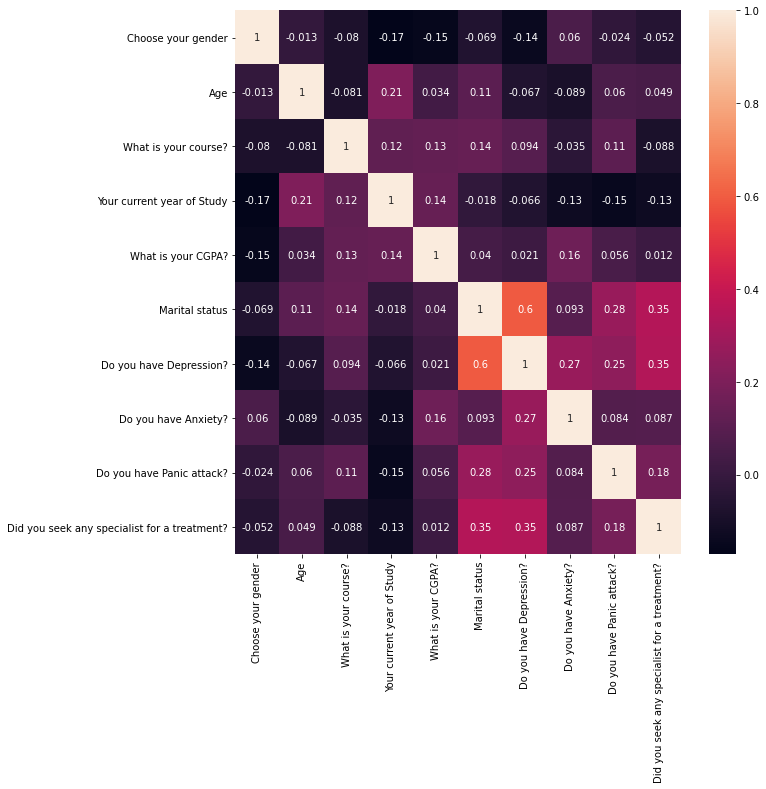

In [73]:
corrmat= df_copy.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True, cmap=None)

### Findings
- Marriage and Depression are corelated
- Those who suffer from depression and are also married are likely to look for a specialist
- Depression and Anxiety are corelated with a factor 0.27
- Depression and Anxiety are corelated with a factor 0.25
- choice of course and depressin are correlated with factor 0.094

### Split Data into training and testing sets

In [77]:
df_copy.columns

Index(['Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [87]:
# Let's separate the Target Variable and Predicator Varibles
X = df_copy.drop(['Choose your gender','What is your CGPA?','Marital status','Did you seek any specialist for a treatment?'],axis=1)
y = df['Do you have Depression?']

In [89]:
X

,Age,What is your course?,Your current year of Study,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?
0,18,17,3,1,0,1
1,21,25,4,0,1,0
2,19,4,0,1,1,1
3,22,33,5,1,0,0
4,23,37,6,0,0,0
...,...,...,...,...,...,...
96,21,2,3,0,1,0
97,18,17,1,1,1,0
98,19,38,2,1,0,1
99,23,39,6,0,0,0


In [92]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)


In [94]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (70, 6)
y_train -  (70,)
X_test -  (31, 6)
y_test -  (31,)


### Logistic regression

In [96]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

In [99]:
# Predict from Test set

y_pred = logreg.predict(X_test)

In [102]:
# Model Evolution
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        21
         Yes       1.00      1.00      1.00        10

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [105]:
# Predicted values counts for Depression and Non Depression of test dataset
pd.Series(y_pred).value_counts()

No     21
Yes    10
dtype: int64

> Our model predicted 21 students have no depression and 10 students have depression from the dataset

In [107]:
# Actual values counts for Depression and Non-Depression  of test dataset
pd.Series(y_test).value_counts()

No     21
Yes    10
Name: Do you have Depression?, dtype: int64

> There are originally 21 cases tha don't have depression and 10 have depression 
so our accuracy is 10/10 = 1 

In [109]:
# confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[21,  0],
       [ 0, 10]], dtype=int64)

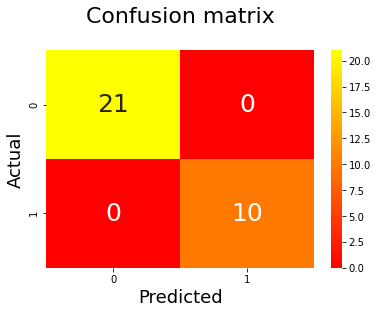

In [111]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="autumn" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)
plt.show()

> so 10 cases are true positive i.e have depression and 21 cases are true neagative. There are no false positive or false negative. Therefore the prediction is accurate. And the accuracy is 100%.

ValueError: could not convert string to float: 'Yes'